# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

## Import Statements

In [321]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [127]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [128]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [129]:
print(f'{df_hh_income.shape=}')
print(f'{df_pct_completed_hs.shape=}')
print(f'{df_pct_poverty.shape=}')
print(f'{df_share_race_city.shape=}')
print(f'{df_fatalities.shape=}')

df_hh_income.shape=(29322, 3)
df_pct_completed_hs.shape=(29329, 3)
df_pct_poverty.shape=(29329, 3)
df_share_race_city.shape=(29268, 7)
df_fatalities.shape=(2535, 14)


In [130]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [131]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [132]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [133]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [134]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [135]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [136]:
df_fatalities = df_fatalities.fillna(0)

In [137]:
df_fatalities.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [138]:
print(f'{df_hh_income.isna().values.any()=}')
print(f'{df_pct_completed_hs.isna().values.any()=}')
print(f'{df_pct_poverty.isna().values.any()=}')
print(f'{df_share_race_city.isna().values.any()=}')

df_hh_income.isna().values.any()=True
df_pct_completed_hs.isna().values.any()=False
df_pct_poverty.isna().values.any()=False
df_share_race_city.isna().values.any()=False


In [139]:
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna().values.any()

False

In [140]:
print(f'{df_hh_income.duplicated().values.any()=}')
print(f'{df_pct_completed_hs.duplicated().values.any()=}')
print(f'{df_pct_poverty.duplicated().values.any()=}')
print(f'{df_share_race_city.duplicated().values.any()=}')

df_hh_income.duplicated().values.any()=False
df_pct_completed_hs.duplicated().values.any()=False
df_pct_poverty.duplicated().values.any()=False
df_share_race_city.duplicated().values.any()=False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [141]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.str.replace('-', '0')
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [142]:
df_pct_poverty = df_pct_poverty.groupby('Geographic Area').poverty_rate.mean().reset_index(name='pct')
df_pct_poverty.sort_values('pct', inplace=True)
df_pct_poverty

,Geographic Area,pct
31,NJ,8.16
50,WY,9.06
6,CT,9.14
19,MA,9.55
20,MD,10.27
39,RI,10.37
34,NY,11.64
44,UT,11.72
28,ND,12.13
12,IA,12.23


In [143]:
bar = px.bar(x=df_pct_poverty.pct,
             y=df_pct_poverty['Geographic Area'],
             orientation='h',
             color=df_pct_poverty.pct,
             color_continuous_scale='Viridis',
             title='Poverty Rate in each US State')
bar.update_layout(xaxis_title='Percentage', yaxis_title='State', coloraxis_showscale=False)
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [144]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace('-', '0')
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [145]:
df_pct_completed_hs = df_pct_completed_hs.groupby('Geographic Area').percent_completed_hs.mean().reset_index(name='pct')
df_pct_completed_hs.sort_values('pct', inplace=True)
df_pct_completed_hs

,Geographic Area,pct
43,TX,74.09
25,MS,78.47
10,GA,78.63
32,NM,78.97
18,LA,79.12
3,AZ,79.22
2,AR,79.95
0,AK,80.10
1,AL,80.16
40,SC,80.65


In [146]:
bar = px.bar(x=df_pct_completed_hs.pct,
             y=df_pct_completed_hs['Geographic Area'],
             orientation='h',
             color=df_pct_completed_hs.pct,
             title='High School Graduation Rate by US State')
bar.update_layout(xaxis_title='Percentage', yaxis_title='State', coloraxis_showscale=False)
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

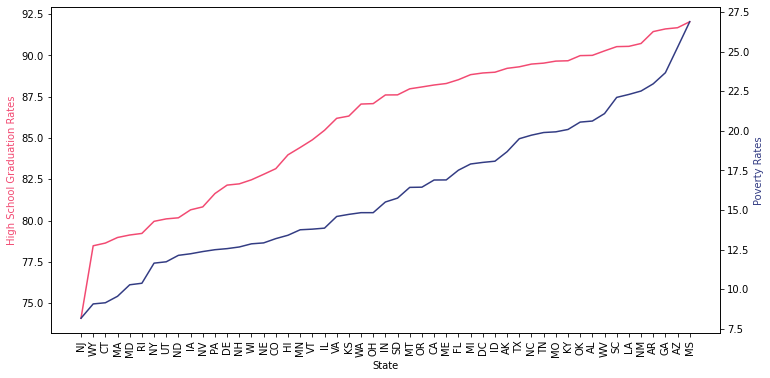

In [147]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)

ax1 = plt.gca()
ax2 = plt.twinx()

ax1.plot(df_pct_completed_hs['Geographic Area'], df_pct_completed_hs.pct, '#F24A72')
ax2.plot(df_pct_poverty['Geographic Area'], df_pct_poverty.pct, '#333C83')

ax1.set_xlabel('State')
ax1.set_ylabel('High School Graduation Rates', color='#F24A72')
ax2.set_ylabel('Poverty Rates', color='#333C83')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

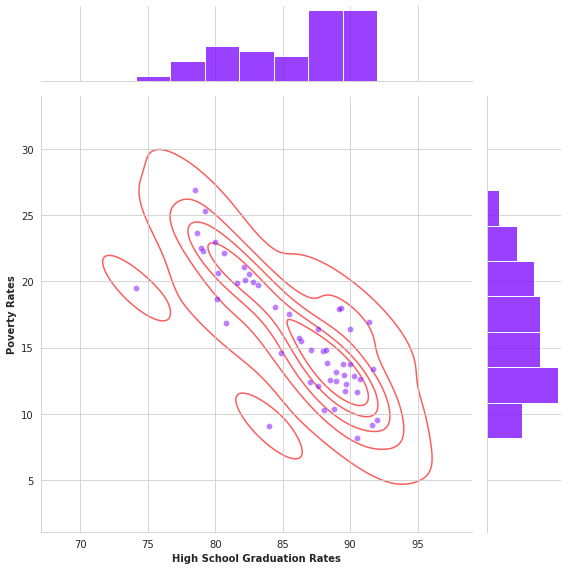

In [251]:
with sns.axes_style('whitegrid'): 
    h = sns.jointplot(x=df_pct_completed_hs.pct,
                      y=df_pct_poverty.pct,
                      joint_kws={'alpha':0.5},
                      kind='scatter',
                      color='#7900FF',
                      height=8)
    h.ax_joint.set_xlabel('High School Graduation Rates', fontweight='bold')
    h.ax_joint.set_ylabel('Poverty Rates', fontweight='bold')
    h.plot_joint(sns.kdeplot, color="#FD5D5D", zorder=0, levels=6)
#     h.ax_joint.set_title('Relationship between Poverty Rates and High School Graduation Rates')
    
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

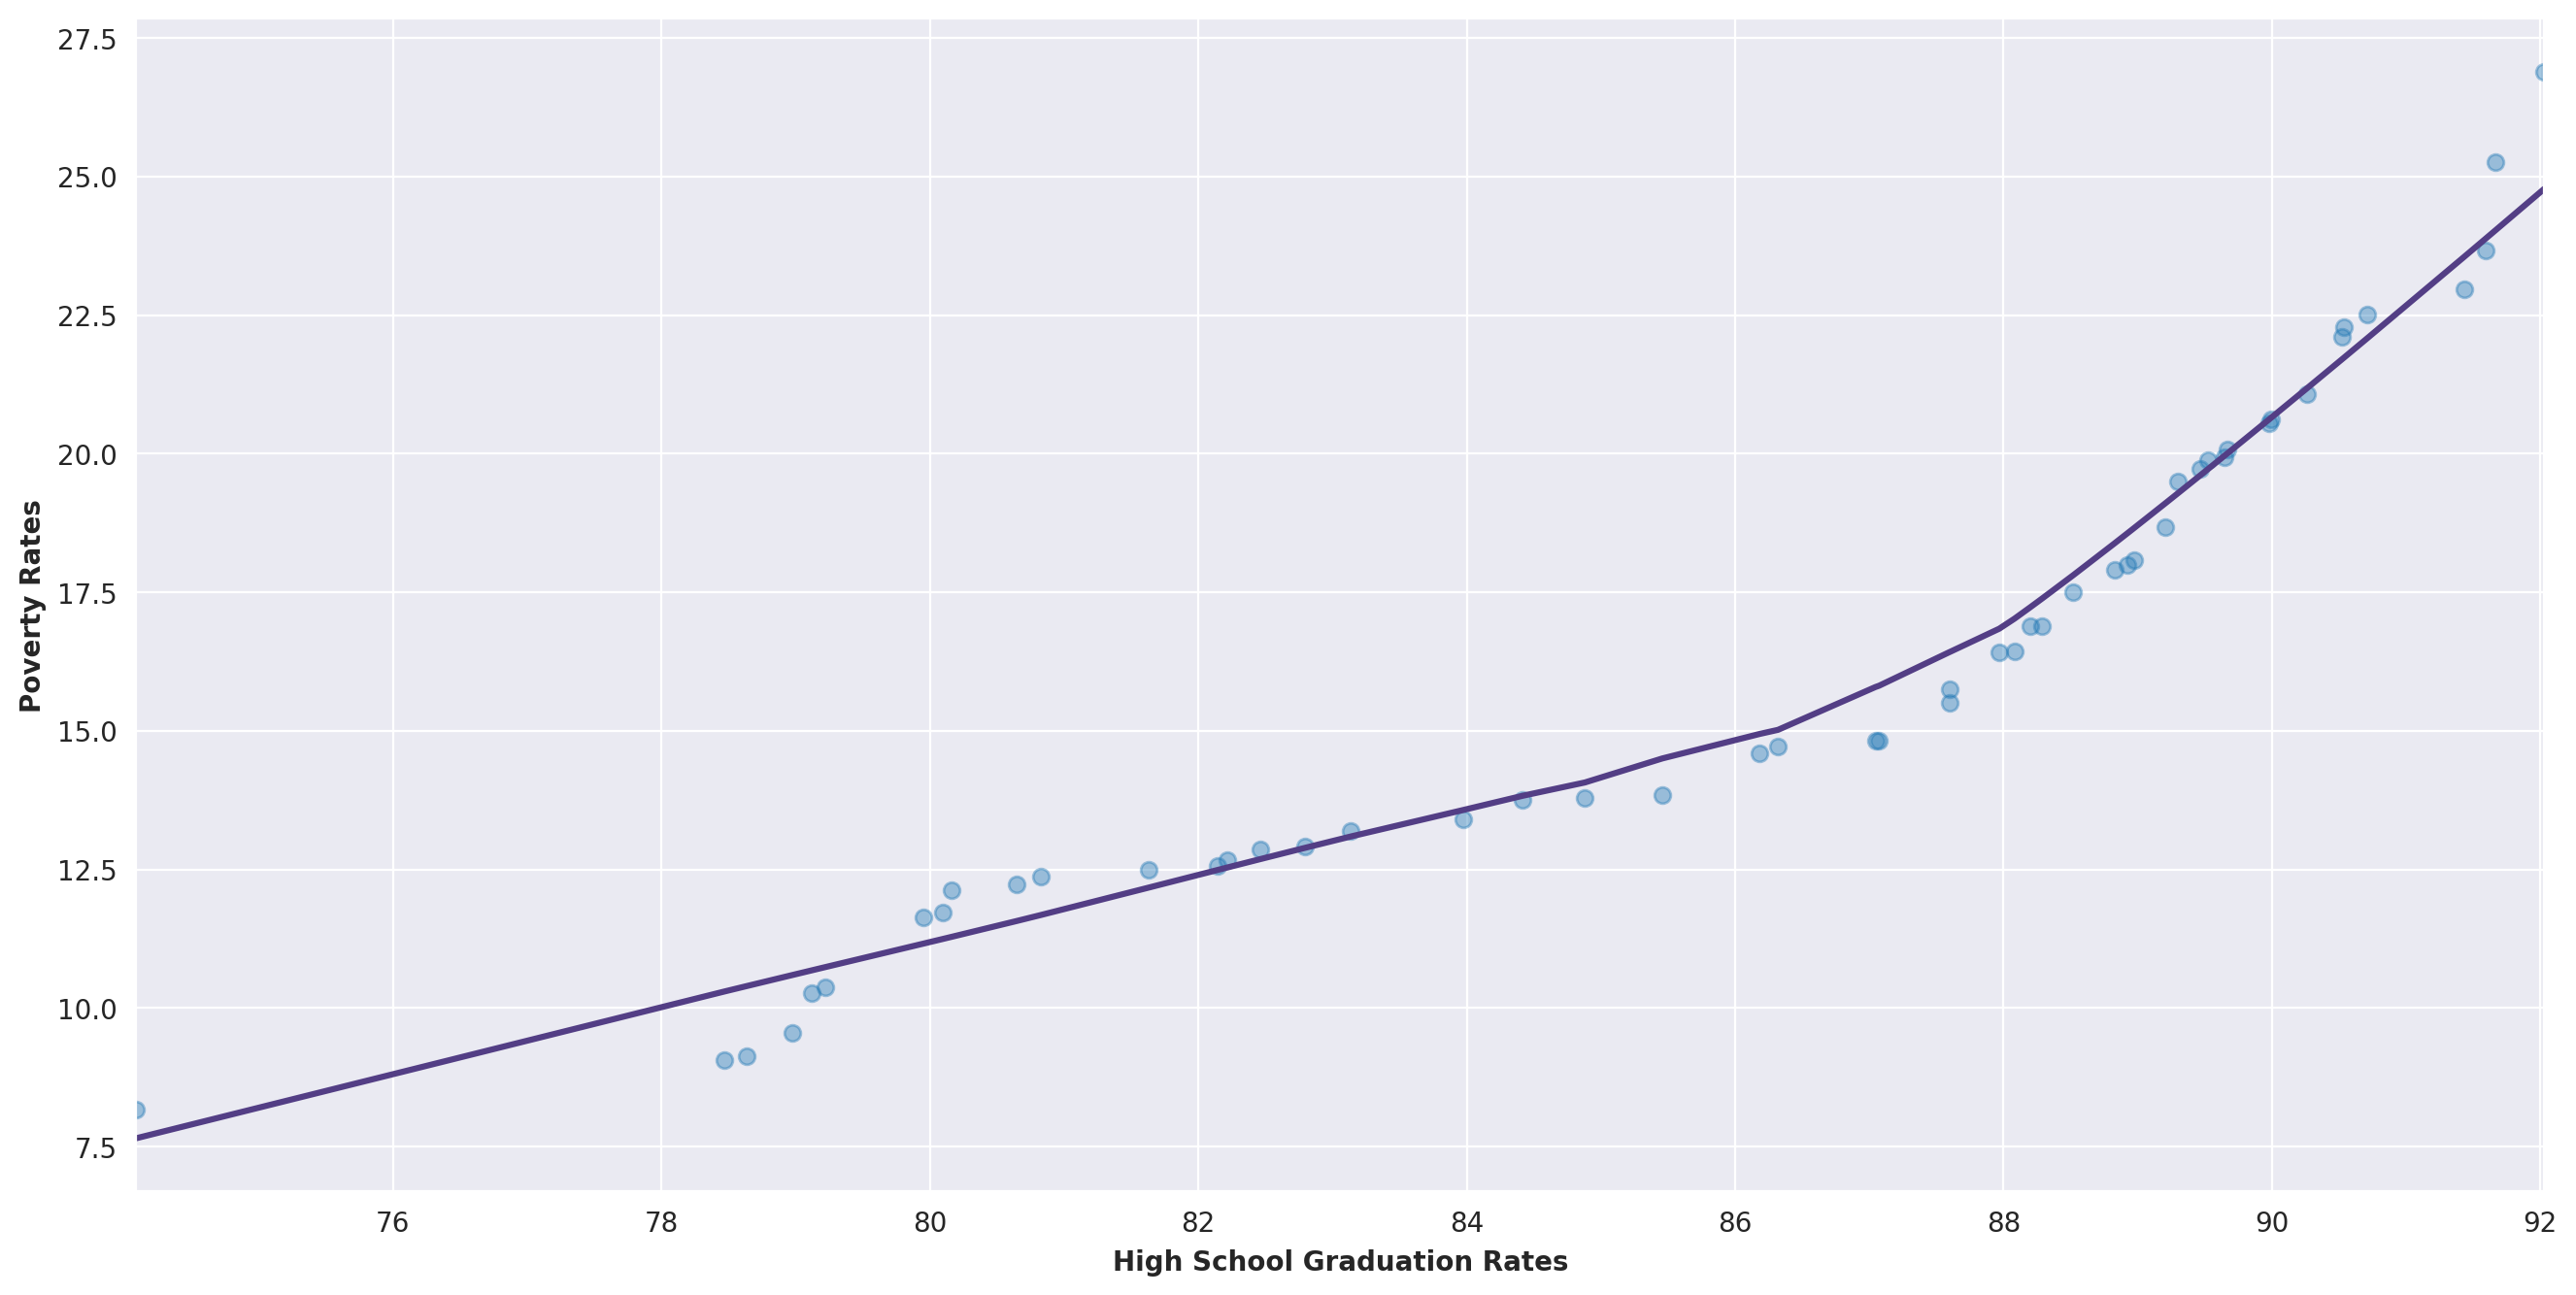

In [149]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style('darkgrid'):
    h = sns.regplot(x=df_pct_completed_hs.pct,
                    y=df_pct_poverty.pct,
                    lowess=True,
                    scatter_kws = {'alpha': 0.4},
                    line_kws={'color': '#533E85'})
    
    h.set_xlabel('High School Graduation Rates', fontweight='bold')
    h.set_ylabel('Poverty Rates', fontweight='bold')
    
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [150]:
df_share_race_city.share_white = df_share_race_city.share_white.str.replace(r'[(X)]', '0')
df_share_race_city.share_black = df_share_race_city.share_black.str.replace(r'[(X)]', '0')
df_share_race_city.share_native_american = df_share_race_city.share_native_american.str.replace(r'[(X)]', '0')
df_share_race_city.share_asian = df_share_race_city.share_asian.str.replace(r'[(X)]', '0')
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.str.replace(r'[(X)]', '0')

<ipython-input-150-ec724ec9cb38>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-150-ec724ec9cb38>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-150-ec724ec9cb38>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-150-ec724ec9cb38>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-150-ec724ec9cb38>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [152]:
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american)
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian)
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic)
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [155]:
df_share_race_city = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean',
                                                                        'share_black': 'mean',
                                                                        'share_native_american': 'mean',
                                                                        'share_asian': 'mean',
                                                                        'share_hispanic': 'mean'}).reset_index()

In [169]:
bar = px.bar(df_share_race_city,
             x='Geographic area',
             y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'],
             title='Racial Makeup of Each US State',
             )

bar.update_layout(xaxis_tickangle=90, xaxis_title='State', yaxis_title='Percentage')

bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [190]:
white = df_share_race_city.share_white.value_counts().reset_index()
black = df_share_race_city.share_black.value_counts().reset_index()
native = df_share_race_city.share_native_american.value_counts().reset_index()
asian = df_share_race_city.share_asian.value_counts().reset_index()
hispanic = df_share_race_city.share_hispanic.value_counts().reset_index()

data = {'Race': ['White', 'Black', 'Native', 'Asian', 'Hispanic'],
        'Percentage': [white['index'].mean(),
                       black['index'].mean(),
                       native['index'].mean(),
                       asian['index'].mean(),
                       hispanic['index'].mean()]}

pie_df = pd.DataFrame(data)

In [200]:
pie = px.pie(pie_df,
             labels='Race',
             values='Percentage',
             names='Race',
             title='People Killed by Race',
             color_discrete_sequence=px.colors.sequential.RdBu)

pie.update_traces(textinfo='percent+label')
pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [203]:
m_f = df_fatalities.gender.value_counts()

In [211]:
bar = px.bar(x=m_f.index,
             y=m_f.values,
             color=m_f.values,
             title='Number of Deaths of Men and Women')

bar.update_layout(xaxis_title='Sex', yaxis_title='Deaths', coloraxis_showscale=False)
bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [225]:
box = px.box(df_fatalities,
             x='gender',
             y='age',
             color='manner_of_death',
             title='Age and Manner of Death by Gender')
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [227]:
df_fatalities.armed.value_counts()

gun                 1398
knife                373
vehicle              177
unarmed              171
undetermined         117
                    ... 
pole and knife         1
crowbar                1
lawn mower blade       1
metal hand tool        1
tire iron              1
Name: armed, Length: 69, dtype: int64

In [228]:
bar = px.bar(x=df_fatalities.armed.value_counts().index,
             y=df_fatalities.armed.value_counts().values)
bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [237]:
df_fatalities[df_fatalities.age < 25].shape[0] / df_fatalities.shape[0] *100

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

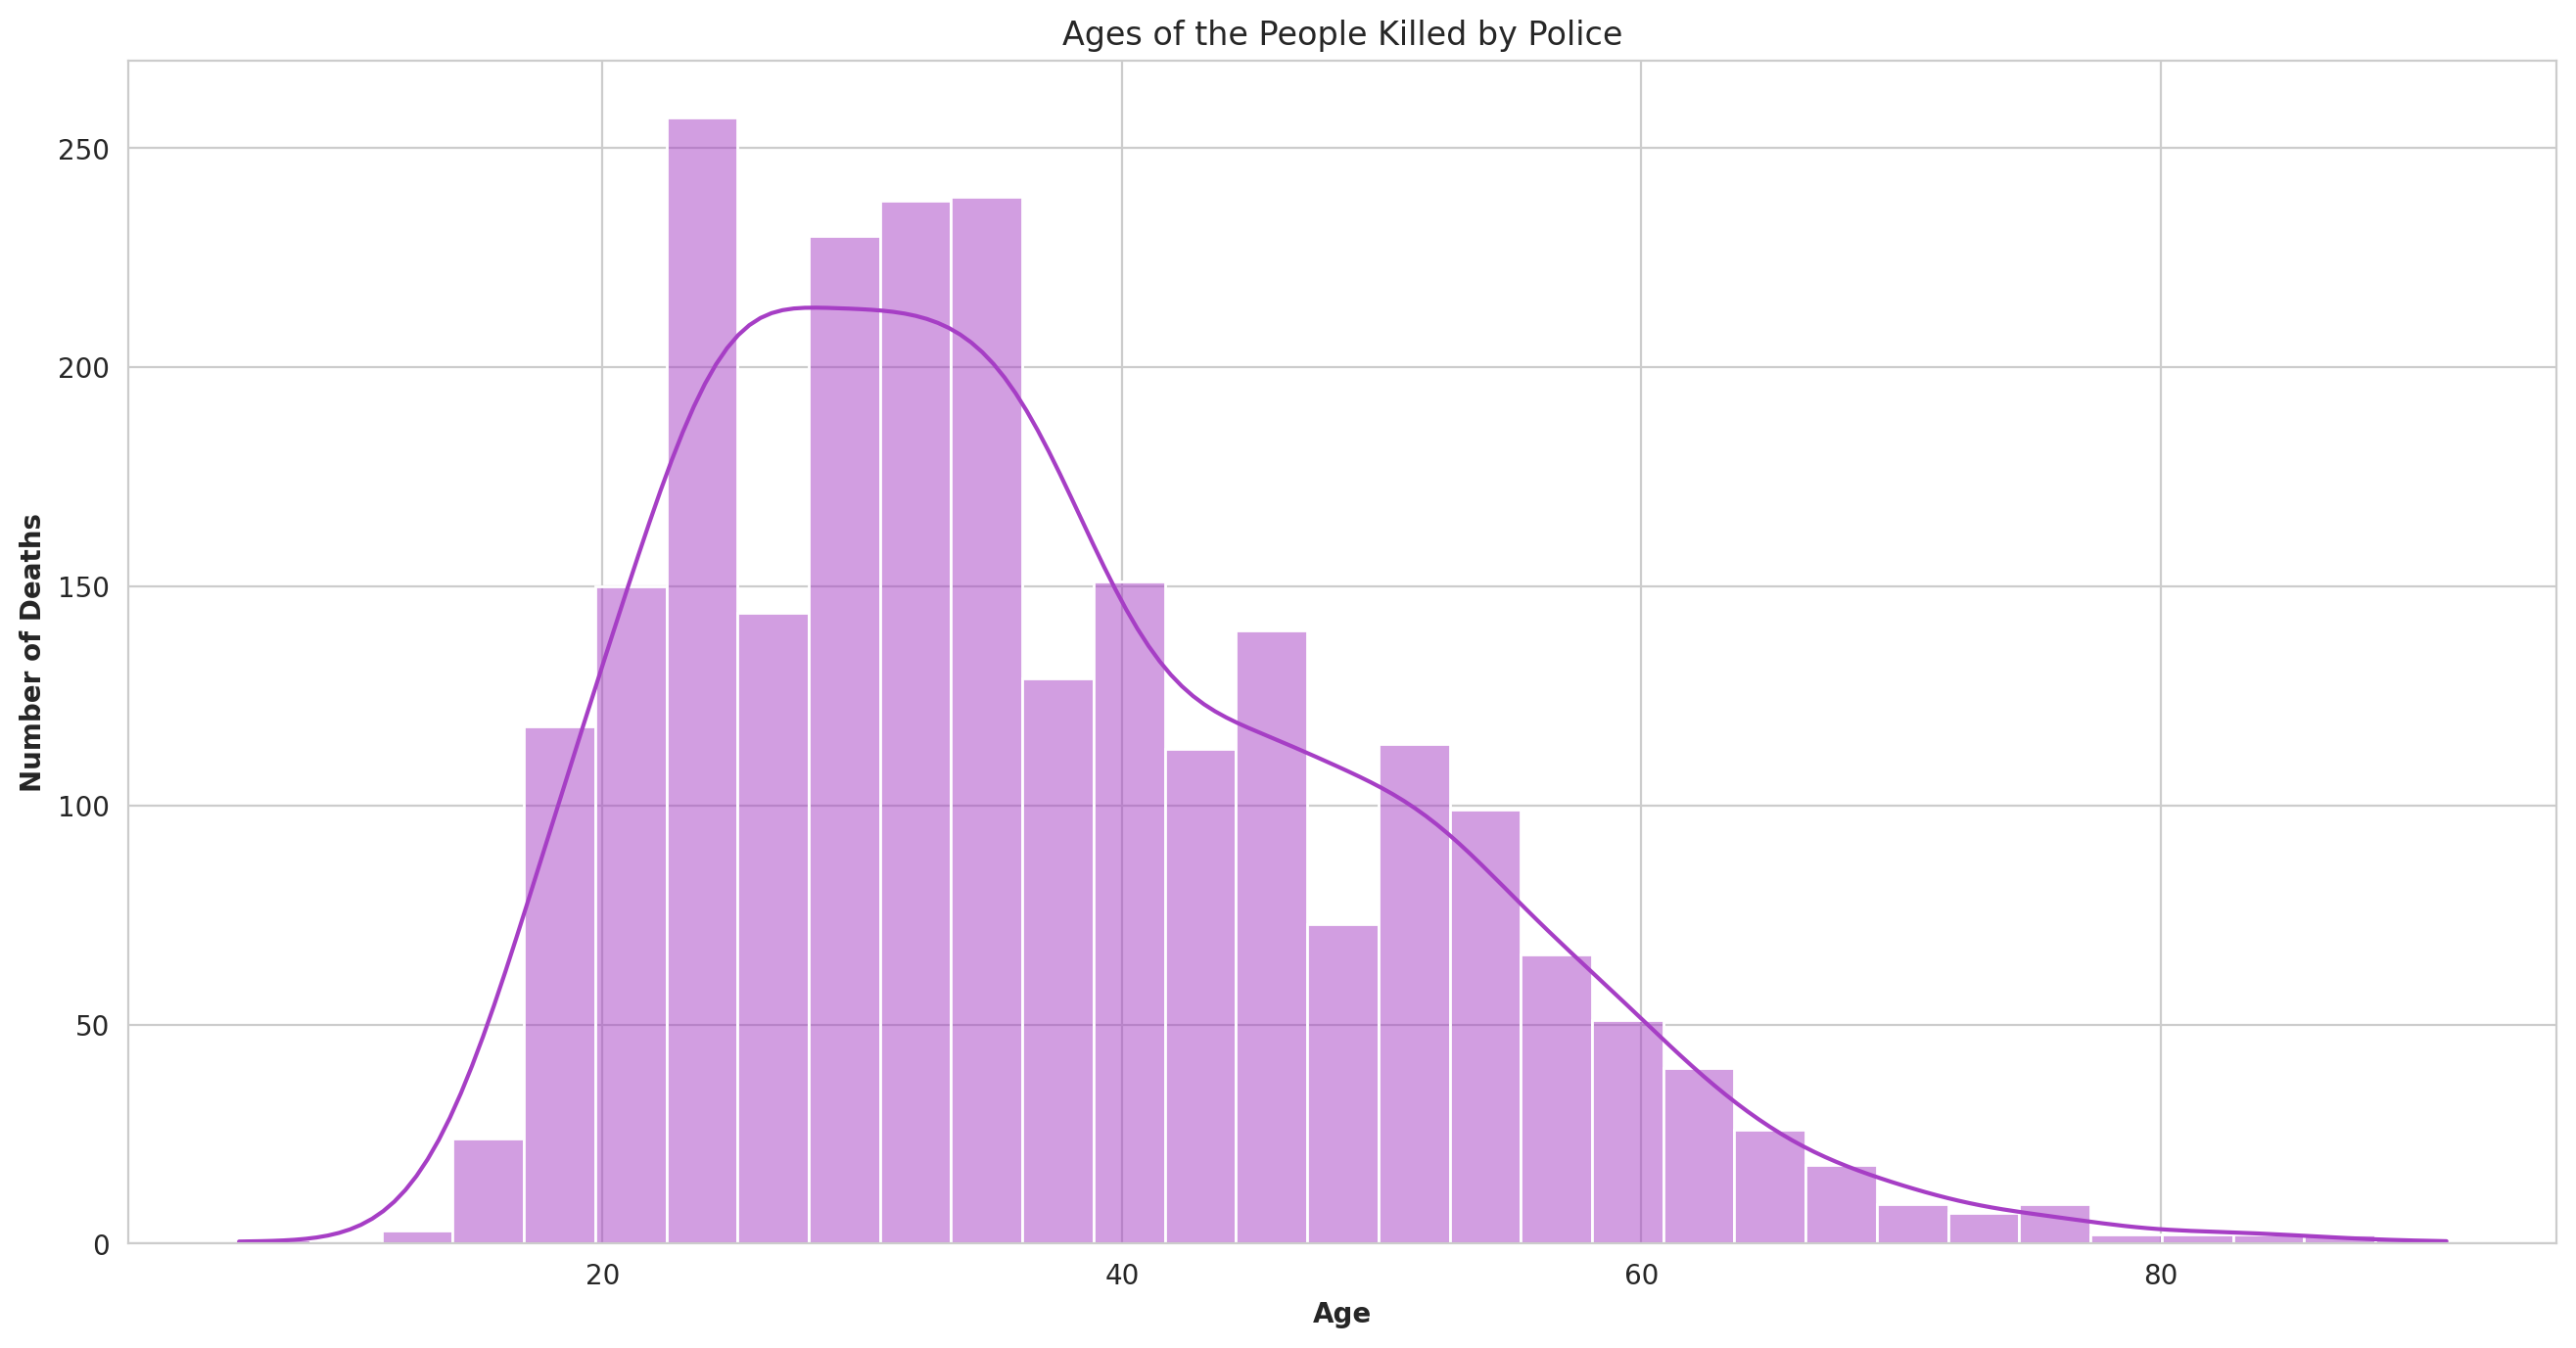

In [248]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style('whitegrid'): 
    h = sns.histplot(df_fatalities[df_fatalities.age !=0],
                     x='age',
                     kde=True,
                     color='#A63EC5')
    
    h.set_xlabel('Age', fontweight='bold')
    h.set_ylabel('Number of Deaths', fontweight='bold')
    h.set_title('Ages of the People Killed by Police')
    
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

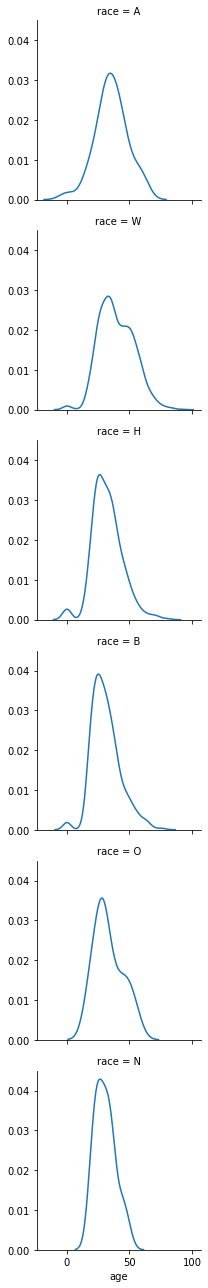

In [259]:
sea = sns.FacetGrid(df_fatalities[df_fatalities.race != 0],
                    row='race')
sea.map(sns.kdeplot, 'age')

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [263]:
bar = px.bar(x=df_fatalities.groupby('race').size().index,
             y=df_fatalities.groupby('race').size().values,
             color=df_fatalities.groupby('race').size().values,
             title='Race of People Killed')

bar.update_layout(xaxis_title='Race', yaxis_title='Number of Deaths', coloraxis_showscale=False)

bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [270]:
mental = df_fatalities.signs_of_mental_illness.value_counts().reset_index()

In [283]:
pct = mental[mental['index'] == True].signs_of_mental_illness.values / df_fatalities.shape[0] * 100

In [286]:
pct

array([24.9704142])

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [290]:
dan_cities = df_fatalities.city.value_counts()[:10].reset_index(name='Count')

In [293]:
bar = px.bar(dan_cities,
             x='Count',
             y='index',
             orientation='h',
             title='Top 10 Citites by Police Killings',
             color='Count')

bar.update_layout(xaxis_title='Number of Deaths', yaxis_title='City', coloraxis_showscale=False)

bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [297]:
top_10_cities = df_fatalities.city.value_counts()[:10].index

In [299]:
top_10_cities = df_fatalities[df_fatalities.city.isin(top_10_cities)]

In [300]:
top_10_cities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.00,M,B,Columbus,OH,True,other,Not fleeing,False
40,75,Pablo Meza,17/01/15,shot,gun,24.00,M,H,Los Angeles,CA,False,attack,Not fleeing,False
48,90,Isaac Holmes,21/01/15,shot,gun,19.00,M,B,St. Louis,MO,False,attack,Not fleeing,False
52,336,Robert Francis Mesch,23/01/15,shot,gun,61.00,M,W,Austin,TX,True,attack,Not fleeing,False
64,348,Nicolas Leland Tewa,27/01/15,shot,vehicle,26.00,M,N,Phoenix,AZ,False,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2793,Isaiah Perkins,20/07/17,shot,gun,27.00,M,B,St. Louis,MO,False,attack,Car,False
2515,2798,Jerrod Kershaw,24/07/17,shot,gun,31.00,M,W,St. Louis,MO,True,attack,Car,False
2520,2804,TK TK,26/07/17,shot,gun,35.00,M,0,Phoenix,AZ,False,attack,Other,False
2521,2806,TK TK,26/07/17,shot,gun,0.00,M,0,San Antonio,TX,False,attack,Not fleeing,False


In [304]:
top_race = top_10_cities.groupby(['city', 'race']).size().reset_index(name='Count')

In [306]:
bar = px.bar(top_race,
             x='Count',
             y='city',
             orientation='h',
             title='Top 10 Citites by Police Killings',
             color='race')

bar.update_layout(xaxis_title='Number of Deaths', yaxis_title='City', coloraxis_showscale=False)

bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [318]:
states = df_fatalities.state.value_counts().reset_index(name='Count')
states

,index,Count
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [339]:
fig = go.Figure(data=go.Choropleth(
                locations=states['index'],
                z=states['Count'],
                locationmode='USA-states',
                colorscale='Greens',
                colorbar_title="Number of Deaths"))

fig.update_layout(
    title_text = 'Police Killings by US State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [342]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

In [347]:
df_fatalities.sort_values('date', inplace=True)

In [348]:
line = px.line(x=df_fatalities.date)
line.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).